In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import glob

path = r'/content/drive/MyDrive/Sales_Data' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
  
  df = pd.read_csv(filename, index_col=None, header=0)
  li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)
frame.to_csv("all_data.csv",index=False)

In [ ]:
all=pd.read_csv("/content/all_data.csv")
print(all.columns)

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')


clean up the data

find NAN rows

In [ ]:
import numpy as np
mask = False
for col in all.columns: 
    mask = mask | all[col].isnull()
dfnulls = all[mask]
all=all.dropna(how="all")
dfnulls

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
199,NaN,NaN,NaN,NaN,NaN,NaN
315,NaN,NaN,NaN,NaN,NaN,NaN
599,NaN,NaN,NaN,NaN,NaN,NaN
675,NaN,NaN,NaN,NaN,NaN,NaN
1027,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185723,NaN,NaN,NaN,NaN,NaN,NaN
185750,NaN,NaN,NaN,NaN,NaN,NaN
186271,NaN,NaN,NaN,NaN,NaN,NaN
186758,NaN,NaN,NaN,NaN,NaN,NaN


drop"or" and delete it

In [ ]:
all=all[all["Order Date"].str[0:2]!="Or"]


converting columns to correct type

In [ ]:
all["Quantity Ordered"]=pd.to_numeric(all["Quantity Ordered"])
all["Price Each"]=pd.to_numeric(all["Price Each"])


Augmenting additional columns


adding month column

In [ ]:
all["month"]=all["Order Date"].str[0:2]
all["month"]=all["month"].astype('int32')

adding sales column

In [ ]:
all["sales"]=all['Quantity Ordered']*all["Price Each"]
all.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales
0,222910,Apple Airpods Headphones,1,150.00,07/26/19 16:51,"389 South St, Atlanta, GA 30301",7,150.00
1,222911,Flatscreen TV,1,300.00,07/05/19 08:55,"590 4th St, Seattle, WA 98101",7,300.00
2,222912,AA Batteries (4-pack),1,3.84,07/29/19 12:41,"861 Hill St, Atlanta, GA 30301",7,3.84
3,222913,AA Batteries (4-pack),1,3.84,07/28/19 10:15,"190 Ridge St, Atlanta, GA 30301",7,3.84
4,222914,AAA Batteries (4-pack),5,2.99,07/31/19 02:13,"824 Forest St, Seattle, WA 98101",7,14.95


adding city column

In [ ]:
all['city'] = all['Purchase Address'].str.rsplit(',').str[1] 
all.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,state
0,222910,Apple Airpods Headphones,1,150.00,07/26/19 16:51,"389 South St, Atlanta, GA 30301",7,150.00,Atlanta,GA 30301
1,222911,Flatscreen TV,1,300.00,07/05/19 08:55,"590 4th St, Seattle, WA 98101",7,300.00,Seattle,WA 98101
2,222912,AA Batteries (4-pack),1,3.84,07/29/19 12:41,"861 Hill St, Atlanta, GA 30301",7,3.84,Atlanta,GA 30301
3,222913,AA Batteries (4-pack),1,3.84,07/28/19 10:15,"190 Ridge St, Atlanta, GA 30301",7,3.84,Atlanta,GA 30301
4,222914,AAA Batteries (4-pack),5,2.99,07/31/19 02:13,"824 Forest St, Seattle, WA 98101",7,14.95,Seattle,WA 98101


add state column


In [ ]:
all['state'] = all['Purchase Address'].str.rsplit(',').str[2] 
all.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,state
0,222910,Apple Airpods Headphones,1,150.00,07/26/19 16:51,"389 South St, Atlanta, GA 30301",7,150.00,Atlanta,GA 30301
1,222911,Flatscreen TV,1,300.00,07/05/19 08:55,"590 4th St, Seattle, WA 98101",7,300.00,Seattle,WA 98101
2,222912,AA Batteries (4-pack),1,3.84,07/29/19 12:41,"861 Hill St, Atlanta, GA 30301",7,3.84,Atlanta,GA 30301
3,222913,AA Batteries (4-pack),1,3.84,07/28/19 10:15,"190 Ridge St, Atlanta, GA 30301",7,3.84,Atlanta,GA 30301
4,222914,AAA Batteries (4-pack),5,2.99,07/31/19 02:13,"824 Forest St, Seattle, WA 98101",7,14.95,Seattle,WA 98101


## **what was the best month for sales**

In [ ]:
results=all.groupby("month").sum()
results

,Quantity Ordered,Price Each,sales
month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


plotting sales on bar graph

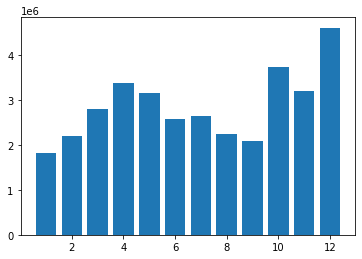

In [ ]:
import matplotlib.pyplot as plt
months= list(range(1,13))
plt.bar(months,results["sales"])
plt.show()

## **Highest city by sales**

In [ ]:
cities=all.groupby("city").sum()
cities.sort_values(by=['sales'],ascending=False)

,Quantity Ordered,Price Each,month,sales
city,,,,
San Francisco,50239,8.211462e+06,315520,8.262204e+06
Los Angeles,33289,5.421435e+06,208325,5.452571e+06
New York City,27932,4.635371e+06,175741,4.664317e+06
Boston,22528,3.637410e+06,141112,3.661642e+06
Atlanta,16602,2.779908e+06,104794,2.795499e+06
Dallas,16730,2.752628e+06,104620,2.767975e+06
Seattle,16553,2.733296e+06,104941,2.747755e+06
Portland,14053,2.307747e+06,87765,2.320491e+06
Austin,11153,1.809874e+06,69829,1.819582e+06


In [ ]:
import matplotlib.pyplot as plt
citi= all["city"].unique()
plt.plot(citi,cities["sales"])
plt.xticks(citi)

plt.show()

IndexError: ignored

## **what time should we display advertisement to maximise likelyhood of customer buying product**

In [ ]:
all["Order Date"]=pd.to_datetime(all["Order Date"])
all["hour"]=all["Order Date"].dt.hour
all["minute"]=all["Order Date"].dt.minute
all.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,state,hour,minute
0,222910,Apple Airpods Headphones,1,150.00,2019-07-26 16:51:00,"389 South St, Atlanta, GA 30301",7,150.00,Atlanta,GA 30301,16,51
1,222911,Flatscreen TV,1,300.00,2019-07-05 08:55:00,"590 4th St, Seattle, WA 98101",7,300.00,Seattle,WA 98101,8,55
2,222912,AA Batteries (4-pack),1,3.84,2019-07-29 12:41:00,"861 Hill St, Atlanta, GA 30301",7,3.84,Atlanta,GA 30301,12,41
3,222913,AA Batteries (4-pack),1,3.84,2019-07-28 10:15:00,"190 Ridge St, Atlanta, GA 30301",7,3.84,Atlanta,GA 30301,10,15
4,222914,AAA Batteries (4-pack),5,2.99,2019-07-31 02:13:00,"824 Forest St, Seattle, WA 98101",7,14.95,Seattle,WA 98101,2,13


In [ ]:
hours=all.groupby("hour").count()
hours.sort_values(by=['sales'],ascending=False)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,state,minute
hour,,,,,,,,,,,
19,12905,12905,12905,12905,12905,12905,12905,12905,12905,12905,12905
12,12587,12587,12587,12587,12587,12587,12587,12587,12587,12587,12587
11,12411,12411,12411,12411,12411,12411,12411,12411,12411,12411,12411
18,12280,12280,12280,12280,12280,12280,12280,12280,12280,12280,12280
20,12228,12228,12228,12228,12228,12228,12228,12228,12228,12228,12228
13,12129,12129,12129,12129,12129,12129,12129,12129,12129,12129,12129
14,10984,10984,10984,10984,10984,10984,10984,10984,10984,10984,10984
10,10944,10944,10944,10944,10944,10944,10944,10944,10944,10944,10944
21,10921,10921,10921,10921,10921,10921,10921,10921,10921,10921,10921


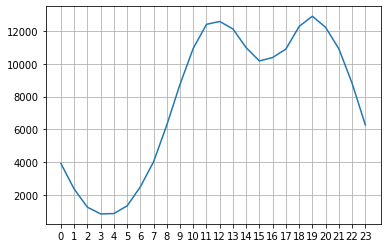

In [ ]:
hourss=[x for x, df in all.groupby("hour")]
plt.plot(hourss,hours["Quantity Ordered"])
plt.xticks(hourss)
plt.grid()
plt.show()

## **what products are most often sold together**

In [ ]:
df=all[all["Order ID"].duplicated(keep=False)]
df["grouped"]=df.groupby('Order ID')['Product'].transform(lambda x:'.'.join(x))
df=df[["Order ID","grouped"]].drop_duplicates()
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Order ID,grouped
118,223028,Vareebadd Phone.USB-C Charging Cable.Wired Hea...
140,223048,Vareebadd Phone.USB-C Charging Cable
188,223095,Apple Airpods Headphones.AA Batteries (4-pack)
201,223106,Wired Headphones.Vareebadd Phone
213,223117,Google Phone.USB-C Charging Cable


In [ ]:
# code yet to be written fr most common pairs, will do later

## **what product sold the most? and why do you think it sold the most?**

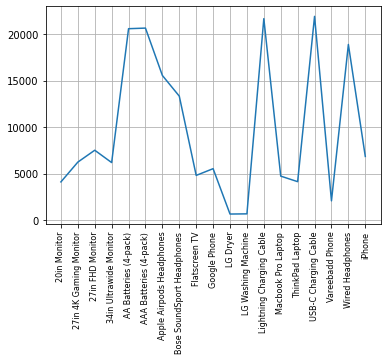

In [ ]:
product_group=all.groupby("Product").count()
products=[x for x, df in all.groupby("Product")]
plt.plot(products,product_group["Quantity Ordered"])
plt.xticks(products,rotation="vertical",size=8)
plt.grid()
plt.show()